In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df= pd.read_csv('red_wine_quality.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
df.shape

(1599, 12)

In [4]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [5]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


# Summary Statistics

In [7]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


key observations

1. The mean is more than median(50th percentile) in all columns 
2. There is a large difference in 75th percentile and max in residual sugar, free sulphur dioxide, total sulphur dioxide 
3. The 1 and 2 observations suggest that there are extreme outliers present in these columns

# Data Visualizations

<AxesSubplot:>

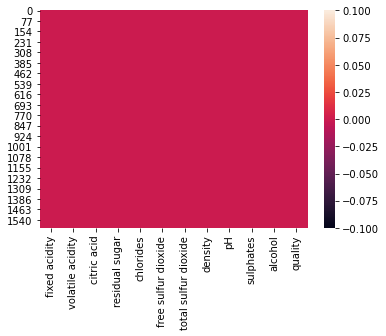

In [8]:
sns.heatmap(df.isnull())

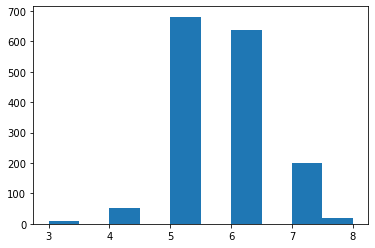

In [9]:
df['quality'].hist(grid=False)
plt.show()

In [10]:
df.quality.unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

Target/dependent variable is descrete and categorical in nature

quality score ranges from 3 to 8; where 3 is low quality and 8 is best quality

Only scores obtained are between 3 to 8.

In [11]:
df.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

Observations:

Quality has most values concentrated in the values of 5,6,7 Few observations are present in 3 and 8

# Checking correlation

In [12]:
dff=df.corr()
dff

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


<AxesSubplot:>

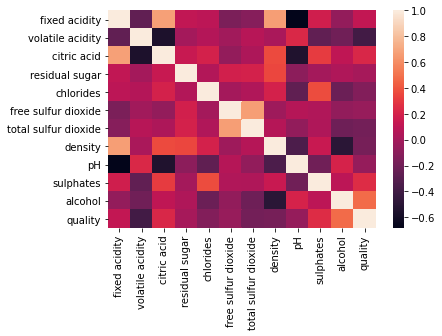

In [13]:
sns.heatmap(dff)

<AxesSubplot:>

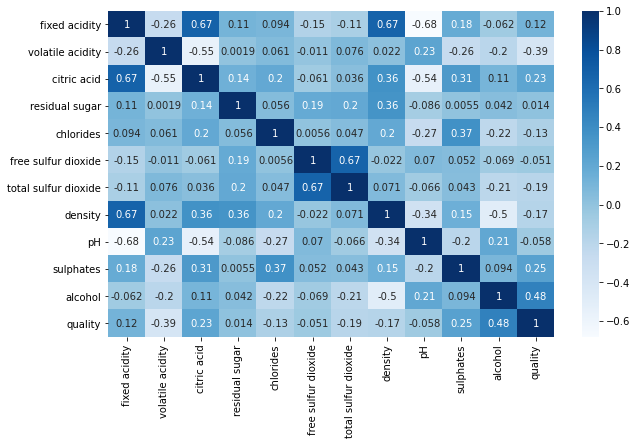

In [14]:
plt.figure(figsize=(10,6))
sns.heatmap(dff, cmap='Blues', annot=True)

In [15]:
corr_matrix= df.corr()
corr_matrix['quality'].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64

# Plotting Outliers

fixed acidity              AxesSubplot(0.125,0.536818;0.110714x0.343182)
volatile acidity        AxesSubplot(0.257857,0.536818;0.110714x0.343182)
citric acid             AxesSubplot(0.390714,0.536818;0.110714x0.343182)
residual sugar          AxesSubplot(0.523571,0.536818;0.110714x0.343182)
chlorides               AxesSubplot(0.656429,0.536818;0.110714x0.343182)
free sulfur dioxide     AxesSubplot(0.789286,0.536818;0.110714x0.343182)
total sulfur dioxide          AxesSubplot(0.125,0.125;0.110714x0.343182)
density                    AxesSubplot(0.257857,0.125;0.110714x0.343182)
pH                         AxesSubplot(0.390714,0.125;0.110714x0.343182)
sulphates                  AxesSubplot(0.523571,0.125;0.110714x0.343182)
alcohol                    AxesSubplot(0.656429,0.125;0.110714x0.343182)
quality                    AxesSubplot(0.789286,0.125;0.110714x0.343182)
dtype: object

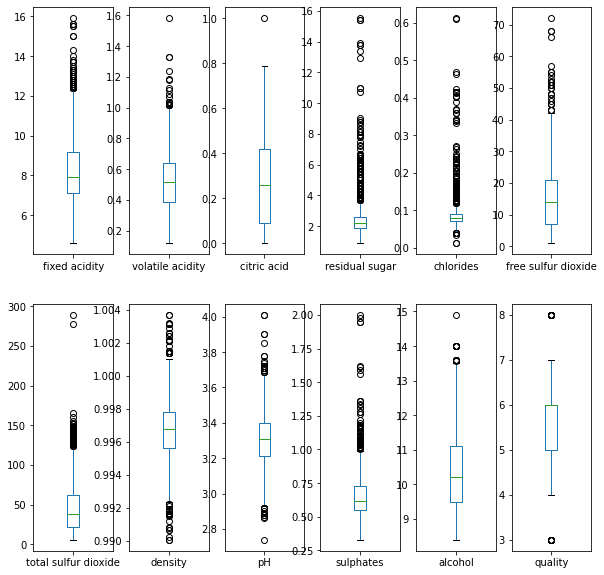

In [16]:
df.plot(kind='box', subplots=True, layout=(2,6), figsize=(10,10))

# To check distribution of skewness

In [17]:
x= df.drop('quality',axis=1)
y= df['quality']

In [18]:
x.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
dtype: float64

In [19]:
from sklearn.preprocessing import power_transform
x_new= power_transform(x)
x= pd.DataFrame(x_new,columns=x.columns)

In [20]:
x.skew()

fixed acidity           0.002529
volatile acidity        0.003099
citric acid             0.017788
residual sugar         -0.015715
chlorides              -0.151304
free sulfur dioxide    -0.009948
total sulfur dioxide   -0.003752
density                -0.005054
pH                     -0.002823
sulphates               0.009985
alcohol                 0.112372
dtype: float64

# Removing Outliers

In [21]:
from scipy.stats import zscore
z= np.abs(zscore(df))
z

array([[0.52835961, 0.96187667, 1.39147228, ..., 0.57920652, 0.96024611,
        0.78782264],
       [0.29854743, 1.96744245, 1.39147228, ..., 0.1289504 , 0.58477711,
        0.78782264],
       [0.29854743, 1.29706527, 1.18607043, ..., 0.04808883, 0.58477711,
        0.78782264],
       ...,
       [1.1603431 , 0.09955388, 0.72391627, ..., 0.54204194, 0.54162988,
        0.45084835],
       [1.39015528, 0.65462046, 0.77526673, ..., 0.30598963, 0.20930812,
        0.78782264],
       [1.33270223, 1.21684919, 1.02199944, ..., 0.01092425, 0.54162988,
        0.45084835]])

In [22]:
threshold=3
print(np.where(z>3))

(array([  13,   14,   15,   15,   17,   17,   19,   33,   38,   42,   43,
         45,   57,   81,   81,   83,   86,   88,   91,   92,   95,  106,
        106,  109,  120,  126,  127,  142,  144,  147,  151,  151,  151,
        151,  163,  164,  169,  169,  181,  199,  226,  226,  240,  243,
        244,  258,  258,  274,  281,  291,  324,  325,  339,  340,  347,
        354,  374,  381,  391,  396,  396,  400,  400,  442,  442,  451,
        459,  467,  480,  480,  494,  515,  517,  544,  554,  554,  555,
        555,  557,  557,  568,  584,  588,  591,  595,  608,  614,  636,
        639,  649,  649,  651,  652,  652,  652,  672,  672,  684,  690,
        690,  692,  692,  695,  723,  724,  730,  754,  776,  777,  795,
        821,  832,  836,  837,  889,  899,  911,  917,  923,  925,  926,
        982, 1017, 1018, 1043, 1051, 1051, 1071, 1074, 1079, 1079, 1081,
       1081, 1111, 1114, 1131, 1154, 1165, 1175, 1186, 1231, 1235, 1244,
       1244, 1244, 1260, 1269, 1269, 1270, 1270, 1

In [23]:
#row and column
z[1570][4]

3.029366492933984

In [24]:
z[13][9]

5.32210116796055

In [25]:
df_new= df[(z<3).all(axis=1)]
df_new

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [26]:
df_new.shape

(1451, 12)

In [27]:
df.shape

(1599, 12)

In [28]:
#141 rows are deleted as an outliers

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

In [30]:
max_accuracy=0
max_randomstate=0
for i in range(1,200):
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.20, random_state=i)
    lr= LogisticRegression()
    lr.fit(x_train, y_train)
    predrf= lr.predict(x_test)
    acc= accuracy_score(y_test, predrf)
    if acc>max_accuracy:
        max_accuracy=acc
        max_randomstate=i
print('Best accuracy is', max_accuracy,'on random_state', max_randomstate)

Best accuracy is 0.646875 on random_state 93


In [31]:
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=.20, random_state=93)

In [32]:
lr= LogisticRegression()
lr.fit(x_train, y_train)
predlr= lr.predict(x_test)
print(accuracy_score(y_test, predlr))
print(confusion_matrix(y_test, predlr))
print(classification_report(y_test, predlr))

0.646875
[[ 0  1  1  0  0  0]
 [ 0  0  6  2  0  0]
 [ 0  0 99 31  1  0]
 [ 0  0 40 89  6  0]
 [ 0  0  2 17 19  0]
 [ 0  0  0  5  1  0]]
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         8
           5       0.67      0.76      0.71       131
           6       0.62      0.66      0.64       135
           7       0.70      0.50      0.58        38
           8       0.00      0.00      0.00         6

    accuracy                           0.65       320
   macro avg       0.33      0.32      0.32       320
weighted avg       0.62      0.65      0.63       320



# Decision Tree Classifier

In [33]:
from sklearn.tree import DecisionTreeClassifier
dtc= DecisionTreeClassifier()
dtc.fit(x_train, y_train)
preddtc= dtc.predict(x_test)
print(accuracy_score(y_test, preddtc))
print(confusion_matrix(y_test, preddtc))
print(classification_report(y_test, preddtc))

0.59375
[[ 0  2  0  0  0  0]
 [ 1  1  4  2  0  0]
 [ 1  8 88 32  2  0]
 [ 0  2 33 78 21  1]
 [ 0  0  3 12 23  0]
 [ 0  0  0  4  2  0]]
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.08      0.12      0.10         8
           5       0.69      0.67      0.68       131
           6       0.61      0.58      0.59       135
           7       0.48      0.61      0.53        38
           8       0.00      0.00      0.00         6

    accuracy                           0.59       320
   macro avg       0.31      0.33      0.32       320
weighted avg       0.60      0.59      0.59       320



# Random Forest Classifier

In [34]:
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier()
rf.fit(x_train, y_train)
predrf= rf.predict(x_test)
print(accuracy_score(y_test, predrf))
print(confusion_matrix(y_test, predrf))
print(classification_report(y_test, predrf))

0.740625
[[  0   0   2   0   0   0]
 [  0   0   7   1   0   0]
 [  0   0 109  21   1   0]
 [  0   0  24 106   5   0]
 [  0   0   3  13  22   0]
 [  0   0   0   3   3   0]]
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         8
           5       0.75      0.83      0.79       131
           6       0.74      0.79      0.76       135
           7       0.71      0.58      0.64        38
           8       0.00      0.00      0.00         6

    accuracy                           0.74       320
   macro avg       0.37      0.37      0.36       320
weighted avg       0.70      0.74      0.72       320



# SVC

In [35]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(x_train, y_train)
predsvc= svc.predict(x_test)
print(accuracy_score(y_test, predsvc))
print(confusion_matrix(y_test, predsvc))
print(classification_report(y_test, predsvc))

0.66875
[[  0   0   2   0   0   0]
 [  0   0   7   1   0   0]
 [  0   0 103  27   1   0]
 [  0   0  35  96   4   0]
 [  0   0   0  23  15   0]
 [  0   0   0   4   2   0]]
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         8
           5       0.70      0.79      0.74       131
           6       0.64      0.71      0.67       135
           7       0.68      0.39      0.50        38
           8       0.00      0.00      0.00         6

    accuracy                           0.67       320
   macro avg       0.34      0.32      0.32       320
weighted avg       0.64      0.67      0.65       320



Logistic Regression, Random Forest Classifier and SVC are producing good accuracy. Now we will check cross validation score as well for overfitting(if exists)

# Cross Validation Score

In [36]:
from sklearn.model_selection import cross_val_score

cr= cross_val_score(lr, x, y, cv=5)
print('Cross Validation score of Logistic Regression model is: ', cr.mean())

Cross Validation score of Logistic Regression model is:  0.5703879310344828


In [37]:
cr= cross_val_score(rf, x, y, cv=5)
print('Cross Validation score of Random Forest Classifier model is: ', cr.mean())

Cross Validation score of Random Forest Classifier model is:  0.5760011755485894


In [38]:
cr= cross_val_score(svc, x, y, cv=5)
print('Cross Validation score of SVC model is: ', cr.mean())

Cross Validation score of SVC model is:  0.567862460815047


Random Forest Classifier is perfoming better among all so we will continue with Random Forest Classifier

# Hyper Parameter Tuning

In [39]:
from sklearn.model_selection import GridSearchCV

#creating parameter list to pass in GridSearchCV
parameters= {'max_features':['auto','sqrt','log2'],
            'max_depth': [4,5,6,7,8],
            'criterion': ['gini','entropy']}

In [40]:
gsv= GridSearchCV(RandomForestClassifier(),parameters,cv=5,scoring='accuracy')
gsv.fit(x_train, y_train)  #fitting the data in model
gsv.best_params_ #printing the best parameters found by GridSearchCV

{'criterion': 'gini', 'max_depth' :7, 'max_features': 'sqrt'}

gsv_pred=gsv.best_estimator_.predict(x_test)   #predicting with best parameters
accuracy_score(y_test, gsv_pred)   #checking final accuracy

0.7125

# ROC AUC Plot

In [44]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [45]:
clf = OneVsRestClassifier(LogisticRegression())
clf.fit(x_train, y_train)
pred = clf.predict(x_test)
pred_prob = clf.predict_proba(x_test)

In [46]:
# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

In [48]:
n_class = 6

In [49]:
for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pred_prob[:,i], pos_label=i)

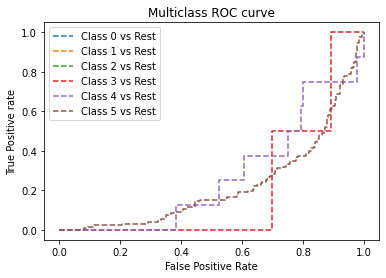

In [54]:
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',label='Class 3 vs Rest')
plt.plot(fpr[4], tpr[4], linestyle='--',label='Class 4 vs Rest')
plt.plot(fpr[5], tpr[5], linestyle='--',label='Class 5 vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300)

# Saving the model in pickle format

In [57]:
import joblib 
joblib.dump(gsv.best_estimator_,'Red Wine Quality.pkl')

['Red Wine Quality.pkl']